In [1]:
import pandas as pd
import numpy as np
import json
import networkx as nx
import os
from operator import itemgetter
import math

C:\ProgramData\Anaconda3_new\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3_new\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3_new\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  stacklevel=1)


In [29]:
# book = 'SOMEWT'
book = 'Life_of_Mahatma_Gandhi'

year_window = 3
start_year = 1888
end_year = 1924
window_size = 1

In [25]:
with open('json_files/%s/date_person_list.json' % book) as handle:
    date_to_person_list = json.load(handle)

with open('json_files/%s/date_person_list_with_mention.json' %book) as handle:
    date_to_person_list_with_mention = json.load(handle)

In [26]:
# given date dict creates and returns temporal graph
def returnGraph(date_dict,start_year,end_year):
    mygraph = nx.Graph()
    print("creating graph with start year:" + str(start_year))
    for year1 in date_dict.keys():
        if int(year1) < start_year or int(year1) > end_year:
            continue
        #first creating edges in the same year
        for node1 in date_dict[year1]:
            for node2 in date_dict[year1]:
                if node1 != node2:
                    mygraph.add_edge(node1,node2)
                    
        # now creating edges as per window
        for year2 in date_dict.keys():
            if int(year2) < start_year or int(year2) > end_year:
                continue
            if int(year2) <= int(year1) or int(year2) > int(year1) + window_size:
                continue
            for node1 in date_dict[year1]:
                for node2 in date_dict[year2]:
                    if node1 != node2:
                        mygraph.add_edge(node1,node2)
    
    return mygraph


def returnTopMentionList(date_dict_with_mention, start_year, end_year, N=10):
    
    mydict = {}
    
    for year in date_dict_with_mention.keys():
        if int(year) < start_year or int(year) > end_year:
            continue
   
        for entity, mention in date_dict_with_mention[year].items():
            try:
                mydict[entity] += mention
            except:
                mydict[entity] = mention
                    
    res = dict(sorted(mydict.items(), key = itemgetter(1), reverse = True)[:N])
    
    return res
        
def Jaccard_score(lista_1, lista_2, lista_3):    
    inter = len(list(set(lista_1) & set(lista_2) & set(lista_3)))
    union = len(list(set(lista_1) | set(lista_2) | set(lista_3)))
    if union <=0:
        return 0
    else:
        return inter/union

In [5]:
def get_graph_data(graph, book, start_year, end_year, new_nodes=[]):

    # using category10 color pallete
    color_pallete =  ['#0eabff', '#ff320e', '#1f77b4', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
   
    chart_data = []
    node_color_list = []
    
    for node in graph.nodes():
        dic = {}
        dic['from'] = node
        if node in new_nodes:
            dic['color'] = color_pallete[1]
        else:
            dic['color'] = color_pallete[0]
        node_color_list.append(dic)
            
    for edge in graph.edges():
        dic = {}
        dic['from'] = edge[0]
        dic['to'] = edge[1]
        dic['value'] = 1
        chart_data.append(dic)
        
    node_color_list = sorted(node_color_list, key = lambda i: i['color'])
    chart_data = node_color_list + chart_data

    title = "Mention network of people (" + str(start_year) + "-" + str(end_year) +  ")" 

    return chart_data

In [31]:
top_nodes = {}
bar_chart_data = []
jaccard_data = []
old_graph = returnGraph(date_to_person_list, start_year, start_year)



from operator import itemgetter
N=10

for year in range(start_year, end_year, year_window):
    dic = {}
    year_range = str(year) + '-' + str(year+year_window-1)
    top_nodes[year_range] = {}
    
    graph_person = returnGraph(date_to_person_list, start_year, year+year_window-1)
    
    if len(graph_person.nodes) > 0:
        core = nx.k_core(graph_person)
#         print(nx.core_number(graph_person))
        print(nx.density(core))
#     close_cen = nx.closeness_centrality(graph_person)
#     top_close = dict(sorted(close_cen.items(), key = itemgetter(1), reverse = True)[:N])
#     print(f"closeness centrality:  {top_close}")
#     top_nodes[year_range]['closeness_centrality'] = list(top_close.keys())
    
#     bet_cen = nx.betweenness_centrality(graph_person)
#     top_bet = dict(sorted(bet_cen.items(), key = itemgetter(1), reverse = True)[:N])
#     print(f"betweenness centrality:  {top_bet}")
#     top_nodes[year_range]['betweenness_centrality'] = list(top_bet.keys())
    
#     top_mention = returnTopMentionList(date_to_person_list_with_mention, year, year+year_window-1)
#     print(f"Top mention:  {top_mention}")
#     top_nodes[year_range]['top_mention'] = list(top_mention.keys())
    
#     jaccard_score = Jaccard_score(list(top_close.keys()),  list(top_bet.keys()),  list(top_mention.keys()))
#     top_nodes[year_range]['jaccard_score'] = jaccard_score
    
#     new_nodes = list(set(graph_person.nodes()) - set(old_graph.nodes()))
    
#     graph_data = get_graph_data(graph_person, book, start_year=year, end_year=year+year_window-1, new_nodes=new_nodes)
#     old_graph = graph_person.copy()
    
#     graph_data_path = 'static/timeline_graph_data/%s/' % book
#     file_name = 'graph_person_startyear_' + str(year) + '_endyear_' + str(year+year_window-1) + '.json'
#     with open(os.path.join(graph_data_path, file_name), 'w', encoding='utf-8') as content:
#         json.dump(graph_data, content)
#     nx.draw(g)
#     nx.write_graphml(graph_person, 'Results/%s/graph_person' % book + '_startyear_' + str(year) + '_endyear_' + str(year+year_window-1) + '.xml')
#     dic['date'] = '%s-%s'%(year, year+year_window-1)
#     dic['edges'] = len(graph_person.edges())
#     dic['nodes'] = len(graph_person.nodes())
#     dic['jaccard_score'] = jaccard_score
    bar_chart_data.append(dic)
    
    

creating graph with start year:1888
creating graph with start year:1888
1.0
creating graph with start year:1888
1.0
creating graph with start year:1888
1.0
creating graph with start year:1888
1.0
creating graph with start year:1888
1.0
creating graph with start year:1888
1.0
creating graph with start year:1888
1.0
creating graph with start year:1888
1.0
creating graph with start year:1888
1.0
creating graph with start year:1888
1.0
creating graph with start year:1888
1.0
creating graph with start year:1888
1.0


creating graph with start year:1888



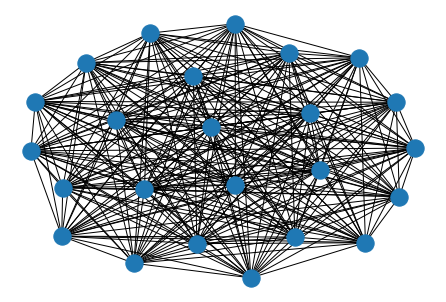

In [37]:
graph_person = returnGraph(date_to_person_list, start_year, start_year+5)

core = nx.k_core(graph_person)
nx.draw(core)
print()

0.5747899159663865


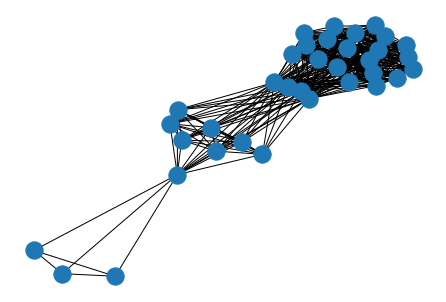

In [38]:
nx.draw(graph_person)
print(nx.density(graph_person))

In [65]:
with open('static/timeline_graph_data/%s/bar_chart_nodes_edges.json'%(book), 'w') as content:
    json.dump(bar_chart_data, content, indent=4)
    
with open('static/timeline_graph_data/%s/top_nodes.json'%(book), 'w') as content:
    json.dump(top_nodes, content, indent=4)

bar_chart_data

[{'date': '1888-1890', 'edges': 282, 'nodes': 28, 'jaccard_score': 0.25},
 {'date': '1891-1893',
  'edges': 34,
  'nodes': 11,
  'jaccard_score': 0.8181818181818182},
 {'date': '1894-1896', 'edges': 21, 'nodes': 7, 'jaccard_score': 1.0},
 {'date': '1897-1899', 'edges': 0, 'nodes': 0, 'jaccard_score': 0},
 {'date': '1900-1902', 'edges': 0, 'nodes': 0, 'jaccard_score': 0},
 {'date': '1903-1905', 'edges': 0, 'nodes': 0, 'jaccard_score': 0},
 {'date': '1906-1908',
  'edges': 447,
  'nodes': 38,
  'jaccard_score': 0.3333333333333333},
 {'date': '1909-1911', 'edges': 378, 'nodes': 28, 'jaccard_score': 0.25},
 {'date': '1912-1914', 'edges': 45, 'nodes': 10, 'jaccard_score': 1.0},
 {'date': '1915-1917',
  'edges': 261,
  'nodes': 28,
  'jaccard_score': 0.42857142857142855},
 {'date': '1918-1920',
  'edges': 435,
  'nodes': 30,
  'jaccard_score': 0.1111111111111111},
 {'date': '1921-1923',
  'edges': 435,
  'nodes': 30,
  'jaccard_score': 0.17647058823529413}]

In [1]:
# !pip install pyviz --user
# return most appeared name in the year range
def returnNameMentions(date_dict,start_year,end_year):
    
    mention_dict = {}
    print("creating graph with start year:" + str(start_year))
    for year1 in date_dict.keys():
        if int(year1) < start_year or int(year1) > end_year:
            continue
            
#         print(date_dict[year1])
        for key, value in date_dict[year1].items():
            mention_dict[key] += value
#         #first creating edges in the same year
#         for node1 in date_dict[year1]:
#             for node2 in date_dict[year1]:
#                 if node1 != node2:
#                     mygraph.add_edge(node1,node2)
                    
#         # now creating edges as per window
#         for year2 in date_dict.keys():
#             if int(year2) < start_year or int(year2) > end_year:
#                 continue
#             if int(year2) <= int(year1) or int(year2) > int(year1) + window_size:
#                 continue
#             for node1 in date_dict[year1]:
#                 for node2 in date_dict[year2]:
#                     if node1 != node2:
#                         mygraph.add_edge(node1,node2)
    
    return mention_dict

In [2]:
for year in range(start_year, end_year, year_window):
    print(returnNameMentions(date_to_person_list_with_mention, year, year+year_window -1))

NameError: name 'start_year' is not defined